Inspired by a nice blog post from https://astralord.github.io/posts/transformer-inference-optimization-toolset/

JAX (see https://www.sscardapane.it/iaml-backup/jax-intro/)

- JAX - wrapper of NumPy

- JAX - Efficiency is a strong point. Uses XLA, a linear algebra accelerator

- JAX - "A soul of pure functional programming"🤔

An interesting library to help out with the JAX neural network training - https://github.com/google/flax


(Note that PyTorch now has implementations for Transformer Encoder layers and Multihead Attention, however it is still a useful exercise to implement some of these parts from scratch)

In [56]:
import jax.numpy as np

x = np.ones((5000, 5000))
y = np.arange(5000)

z = np.sin(x) + np.cos(y)

In [57]:
z

Array([[ 1.841471  ,  1.3817732 ,  0.4253241 , ...,  0.54892856,
        -0.12124914,  0.09369355],
       [ 1.841471  ,  1.3817732 ,  0.4253241 , ...,  0.54892856,
        -0.12124914,  0.09369355],
       [ 1.841471  ,  1.3817732 ,  0.4253241 , ...,  0.54892856,
        -0.12124914,  0.09369355],
       ...,
       [ 1.841471  ,  1.3817732 ,  0.4253241 , ...,  0.54892856,
        -0.12124914,  0.09369355],
       [ 1.841471  ,  1.3817732 ,  0.4253241 , ...,  0.54892856,
        -0.12124914,  0.09369355],
       [ 1.841471  ,  1.3817732 ,  0.4253241 , ...,  0.54892856,
        -0.12124914,  0.09369355]], dtype=float32)

In [58]:
# speeding up blocks of code
# with trace compilation.
from jax import jit

@jit
def fn(x, y):
    z = np.sin(x)
    w = np.cos(y)
    return z + w

In [59]:
# autodiff mechanism:
from jax import grad

@jit
def simple_fun(x):
  return np.sin(x) / x

grad_simple_fun = grad(simple_fun)

In [60]:
import matplotlib.pyplot as plt
plt.rc.style = 'ggplot'

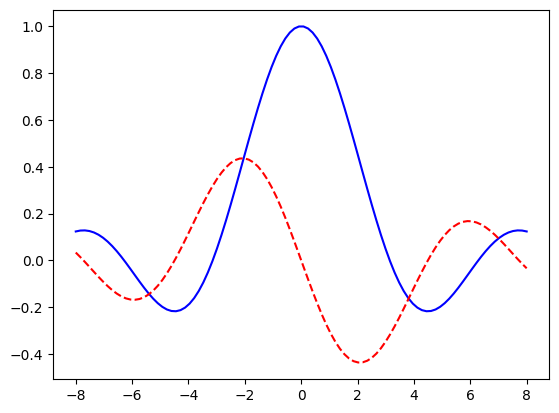

In [61]:
x_range = np.linspace(-8, 8, 100)
plt.plot(x_range, simple_fun(x_range), 'b')
plt.plot(x_range, [grad_simple_fun(xi) for xi in x_range], '--r')

In [62]:
from jax import vmap
grad_vect_simple_fun = vmap(grad_simple_fun)(x_range)

In [63]:
# Self attention
# More readable version (Sebastian Raschka - https://sebastianraschka.com/blog/2023/self-attention-from-scratch.html)

In [64]:
sentence = 'Thalapathy Vijay is the Greatest of All Time :p'

dc = {s:i for i,s in enumerate(sorted(sentence.replace(',', '').split()))}
print(dc)

{':p': 0, 'All': 1, 'Greatest': 2, 'Thalapathy': 3, 'Time': 4, 'Vijay': 5, 'is': 6, 'of': 7, 'the': 8}


In [65]:
import torch
import torch.nn as nn

sentence_int = torch.tensor([dc[s] for s in sentence.replace(',', '').split()])
sentence_int

tensor([3, 5, 6, 8, 2, 7, 1, 4, 0])

In [66]:
torch.manual_seed(123)
embed = torch.nn.Embedding(9, 16)
embedded_sentence = embed(sentence_int).detach()

In [67]:
embedded_sentence

tensor([[ 8.7684e-01,  1.6221e+00, -1.4779e+00,  1.1331e+00, -1.2203e+00,
          1.3139e+00,  1.0533e+00,  1.3881e-01,  2.2473e+00, -8.0364e-01,
         -2.8084e-01,  7.6968e-01, -6.5956e-01, -7.9793e-01,  1.8383e-01,
          2.2935e-01],
        [ 2.5529e-01, -5.4963e-01,  1.0042e+00,  8.2723e-01, -3.9481e-01,
          4.8923e-01, -2.1681e-01, -1.7472e+00, -1.6025e+00, -1.0764e+00,
          9.0315e-01, -7.2184e-01, -5.9508e-01, -7.1122e-01,  6.2296e-01,
         -1.3729e+00],
        [-2.2150e+00, -1.3193e+00, -2.0915e+00,  9.6285e-01, -3.1861e-02,
         -4.7896e-01,  7.6681e-01,  2.7468e-02,  1.9929e+00,  1.3708e+00,
         -5.0087e-01, -2.7928e-01, -2.0628e+00,  6.3745e-03, -9.8955e-01,
          7.0161e-01],
        [-2.5822e-01, -2.0407e+00, -8.0156e-01, -8.1830e-01, -1.1820e+00,
         -2.8774e-01, -6.0430e-01,  6.0024e-01, -1.4053e+00, -5.9217e-01,
         -2.5479e-01,  1.1517e+00, -1.7858e-02,  4.2640e-01, -7.6574e-01,
         -5.4514e-02],
        [-1.3250e+00

In [68]:
d = embedded_sentence.shape[1] # Let this be d

For a sequence of length $T$ and embedding dimension $d$:

$Q$: $d_q \times d$

$K$: $d_k \times d$

$V$: $d_v \times d$

In [69]:
# Sequence lengths for queries: L
# Sequence lengths for keys and values: M

In [90]:
d_q = 2
d_k = 2
d_v = 1

L = 9


Q = torch.nn.Parameter(torch.randn(L, d_q))
K = torch.nn.Parameter(torch.randn(L, d_k))
V = torch.nn.Parameter(torch.randn(L, d_v))

In [91]:
# queries = Q.matmul(embedded_sentence.T).T
# keys = K.matmul(embedded_sentence.T).T
# values = V.matmul(embedded_sentence.T).T

# print("queries.shape:", queries.shape)
# print("keys.shape:", keys.shape)
# print("values.shape:", values.shape)

In [92]:
Q.shape, K.shape, V.shape

(torch.Size([9, 2]), torch.Size([9, 2]), torch.Size([9, 1]))

In [93]:
import torch.nn.functional as F

In [94]:
import math
attn_logits = Q.matmul(K.transpose(-2, -1)) / math.sqrt(d_k)

attention = F.softmax(attn_logits, dim=-1)

In [95]:
attn_logits.shape, attention.shape

(torch.Size([9, 9]), torch.Size([9, 9]))

In [96]:
final_values = attention.matmul(V)
final_values.shape

torch.Size([9, 1])

In [97]:
final_values

tensor([[-0.0856],
        [-0.1369],
        [-0.1569],
        [-0.1128],
        [ 0.1840],
        [-0.2414],
        [-0.1504],
        [ 0.1705],
        [ 0.3798]], grad_fn=<MmBackward0>)

Multi-head attention:

_Pending_

In [98]:
# Nice Github Gist:
# Shoutout to https://gist.github.com/ihsgnef/f13c35cd46624c8f458a4d23589ac768
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def colorize(words, color_array):
    # words is a list of words
    # color_array is an array of numbers between 0 and 1 of length equal to words
    cmap = matplotlib.cm.get_cmap('RdBu')
    template = '<span class="barcode"; style="color: black; background-color: {}">{}</span>'
    colored_string = ''
    for word, color in zip(words, color_array):
        color = matplotlib.colors.rgb2hex(cmap(color)[:3])
        colored_string += template.format(color, '&nbsp' + word + '&nbsp')
    return colored_string
    
words = 'The quick brown fox jumps over the lazy dog'.split()
color_array = np.random.rand(len(words))
s = colorize(words, color_array)

/var/folders/0m/401pb5hj7y59vbxjhd49jjj80000gp/T/ipykernel_83463/1628419886.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('RdBu')


In [99]:
# to display in ipython notebook
from IPython.display import display, HTML
display(HTML(s))  # This is so cool :D, it would be even more fun to show this as we train a model on a larger corpus of text data.

In [100]:
words_2 = sentence.split()
color_array2 = final_values.detach().numpy().flatten()

s2 = colorize(words_2, color_array2)

/var/folders/0m/401pb5hj7y59vbxjhd49jjj80000gp/T/ipykernel_83463/1628419886.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('RdBu')


In [101]:
display(HTML(s2))